<a href="https://colab.research.google.com/github/jai2shan/TSAI-EVA40-Assignments/blob/master/Session%209/QuizDNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from datetime import datetime
print("Current Date/Time: ", datetime.now())

!pip install asgnmt9-0.0.6-py3-none-any.whl

Current Date/Time:  2020-05-30 18:29:29.956212
Processing ./asgnmt9-0.0.6-py3-none-any.whl
  Found existing installation: asgnmt9 0.0.5
    Uninstalling asgnmt9-0.0.5:
      Successfully uninstalled asgnmt9-0.0.5


In [2]:
from torchvision import transforms
from asgnmt9.DataLoader import cifar_data_loader,View_images
transform_params = dict()
transform_params['train'] = transforms.Compose([
                                       transforms.RandomRotation(10),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.RandomAffine(0,shear=10,scale=(0.8,1.2)),  
                                       transforms.ColorJitter(brightness=0.2,contrast=0.2,saturation=0.2),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261))])

transform_params['test'] = transforms.Compose([
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261))])


classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

trainloader,testloader = cifar_data_loader(transform_params,BatchSize=250)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
import torch

from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)


cuda


In [5]:
from asgnmt9.quizDNN import Net
net = Net().to(device)
summary(net, input_size=(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 64, 32, 32]          18,432
              ReLU-6           [-1, 64, 32, 32]               0
       BatchNorm2d-7           [-1, 64, 32, 32]             128
           Dropout-8           [-1, 64, 32, 32]               0
         MaxPool2d-9           [-1, 64, 16, 16]               0
           Conv2d-10          [-1, 128, 16, 16]          73,728
             ReLU-11          [-1, 128, 16, 16]               0
      BatchNorm2d-12          [-1, 128, 16, 16]             256
          Dropout-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1, 128,

In [6]:
from asgnmt9.Training_Testing import TrainTest
import torch.optim as optim
import torch.nn as nn
from torch.optim.lr_scheduler import StepLR

tt = TrainTest()
test_acc = 0
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9,weight_decay = 0.00005)
scheduler = StepLR(optimizer, step_size=20, gamma=0.1)

for epoch in range(30):
    print("EPOCH:", epoch)
    tt.train_(net, device, trainloader, optimizer, criterion, epoch,L1 = False)
    scheduler.step()
    acc = tt.test_(net, device, testloader)  
    
   
print('Finished Training')

  0%|          | 0/200 [00:00<?, ?it/s]

EPOCH: 0


Loss=1.4462623596191406 Batch_id=199 Accuracy=39.87: 100%|██████████| 200/200 [00:28<00:00,  7.00it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: 1.4632, Accuracy: 4877/10000 (48.77%)

EPOCH: 1


Loss=1.0341964960098267 Batch_id=199 Accuracy=55.85: 100%|██████████| 200/200 [00:28<00:00,  6.91it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: 1.1118, Accuracy: 6107/10000 (61.07%)

EPOCH: 2


Loss=1.0587786436080933 Batch_id=199 Accuracy=64.38: 100%|██████████| 200/200 [00:29<00:00,  6.89it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: 0.9489, Accuracy: 6751/10000 (67.51%)

EPOCH: 3


Loss=0.8192060589790344 Batch_id=199 Accuracy=69.09: 100%|██████████| 200/200 [00:29<00:00,  6.84it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: 0.8003, Accuracy: 7215/10000 (72.15%)

EPOCH: 4


Loss=0.8564292788505554 Batch_id=199 Accuracy=72.27: 100%|██████████| 200/200 [00:28<00:00,  6.91it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: 0.6767, Accuracy: 7634/10000 (76.34%)

EPOCH: 5


Loss=0.6004993915557861 Batch_id=199 Accuracy=74.42: 100%|██████████| 200/200 [00:28<00:00,  6.94it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: 0.6750, Accuracy: 7651/10000 (76.51%)

EPOCH: 6


Loss=0.6382541060447693 Batch_id=199 Accuracy=75.93: 100%|██████████| 200/200 [00:28<00:00,  7.04it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: 0.6598, Accuracy: 7713/10000 (77.13%)

EPOCH: 7


Loss=0.5559400916099548 Batch_id=199 Accuracy=77.84: 100%|██████████| 200/200 [00:28<00:00,  6.92it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: 0.5865, Accuracy: 7971/10000 (79.71%)

EPOCH: 8


Loss=0.6055456399917603 Batch_id=199 Accuracy=78.89: 100%|██████████| 200/200 [00:28<00:00,  6.93it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: 0.5643, Accuracy: 8131/10000 (81.31%)

EPOCH: 9


Loss=0.5414174795150757 Batch_id=199 Accuracy=79.63: 100%|██████████| 200/200 [00:28<00:00,  6.97it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: 0.5394, Accuracy: 8158/10000 (81.58%)

EPOCH: 10


Loss=0.5076531767845154 Batch_id=199 Accuracy=80.43: 100%|██████████| 200/200 [00:28<00:00,  7.03it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: 0.5274, Accuracy: 8196/10000 (81.96%)

EPOCH: 11


Loss=0.628342866897583 Batch_id=199 Accuracy=81.26: 100%|██████████| 200/200 [00:28<00:00,  6.94it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: 0.4694, Accuracy: 8425/10000 (84.25%)

EPOCH: 12


Loss=0.5590909719467163 Batch_id=199 Accuracy=81.63: 100%|██████████| 200/200 [00:28<00:00,  6.91it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: 0.5203, Accuracy: 8251/10000 (82.51%)

EPOCH: 13


Loss=0.484311580657959 Batch_id=199 Accuracy=82.45: 100%|██████████| 200/200 [00:28<00:00,  6.95it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: 0.4720, Accuracy: 8397/10000 (83.97%)

EPOCH: 14


Loss=0.4562048017978668 Batch_id=199 Accuracy=83.19: 100%|██████████| 200/200 [00:28<00:00,  6.94it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: 0.4484, Accuracy: 8470/10000 (84.70%)

EPOCH: 15


Loss=0.5568111538887024 Batch_id=199 Accuracy=83.78: 100%|██████████| 200/200 [00:28<00:00,  6.94it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: 0.4358, Accuracy: 8531/10000 (85.31%)

EPOCH: 16


Loss=0.3829403221607208 Batch_id=199 Accuracy=83.89: 100%|██████████| 200/200 [00:28<00:00,  6.95it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: 0.4281, Accuracy: 8548/10000 (85.48%)

EPOCH: 17


Loss=0.5199312567710876 Batch_id=199 Accuracy=84.32: 100%|██████████| 200/200 [00:29<00:00,  6.89it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: 0.4318, Accuracy: 8527/10000 (85.27%)

EPOCH: 18


Loss=0.44544610381126404 Batch_id=199 Accuracy=84.76: 100%|██████████| 200/200 [00:29<00:00,  6.88it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: 0.4280, Accuracy: 8554/10000 (85.54%)

EPOCH: 19


Loss=0.4345274567604065 Batch_id=199 Accuracy=84.98: 100%|██████████| 200/200 [00:28<00:00,  7.00it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: 0.4458, Accuracy: 8515/10000 (85.15%)

EPOCH: 20


Loss=0.3277493417263031 Batch_id=199 Accuracy=87.44: 100%|██████████| 200/200 [00:28<00:00,  6.90it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: 0.3696, Accuracy: 8757/10000 (87.57%)

EPOCH: 21


Loss=0.3407473862171173 Batch_id=199 Accuracy=88.20: 100%|██████████| 200/200 [00:28<00:00,  6.90it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: 0.3640, Accuracy: 8774/10000 (87.74%)

EPOCH: 22


Loss=0.28862398862838745 Batch_id=199 Accuracy=88.68: 100%|██████████| 200/200 [00:28<00:00,  6.95it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: 0.3576, Accuracy: 8799/10000 (87.99%)

EPOCH: 23


Loss=0.41907134652137756 Batch_id=199 Accuracy=88.91: 100%|██████████| 200/200 [00:29<00:00,  6.85it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: 0.3515, Accuracy: 8826/10000 (88.26%)

EPOCH: 24


Loss=0.32215580344200134 Batch_id=199 Accuracy=89.07: 100%|██████████| 200/200 [00:28<00:00,  6.92it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: 0.3508, Accuracy: 8831/10000 (88.31%)

EPOCH: 25


Loss=0.3219222128391266 Batch_id=199 Accuracy=89.21: 100%|██████████| 200/200 [00:29<00:00,  6.81it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: 0.3533, Accuracy: 8830/10000 (88.30%)

EPOCH: 26


Loss=0.32723793387413025 Batch_id=199 Accuracy=89.07: 100%|██████████| 200/200 [00:28<00:00,  6.90it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: 0.3471, Accuracy: 8823/10000 (88.23%)

EPOCH: 27


Loss=0.27397266030311584 Batch_id=199 Accuracy=89.54: 100%|██████████| 200/200 [00:28<00:00,  7.00it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: 0.3508, Accuracy: 8817/10000 (88.17%)

EPOCH: 28


Loss=0.420193076133728 Batch_id=199 Accuracy=89.65: 100%|██████████| 200/200 [00:28<00:00,  6.94it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: 0.3422, Accuracy: 8848/10000 (88.48%)

EPOCH: 29


Loss=0.261747807264328 Batch_id=199 Accuracy=89.67: 100%|██████████| 200/200 [00:29<00:00,  6.82it/s]



Test set: Average loss: 0.3434, Accuracy: 8849/10000 (88.49%)

Finished Training


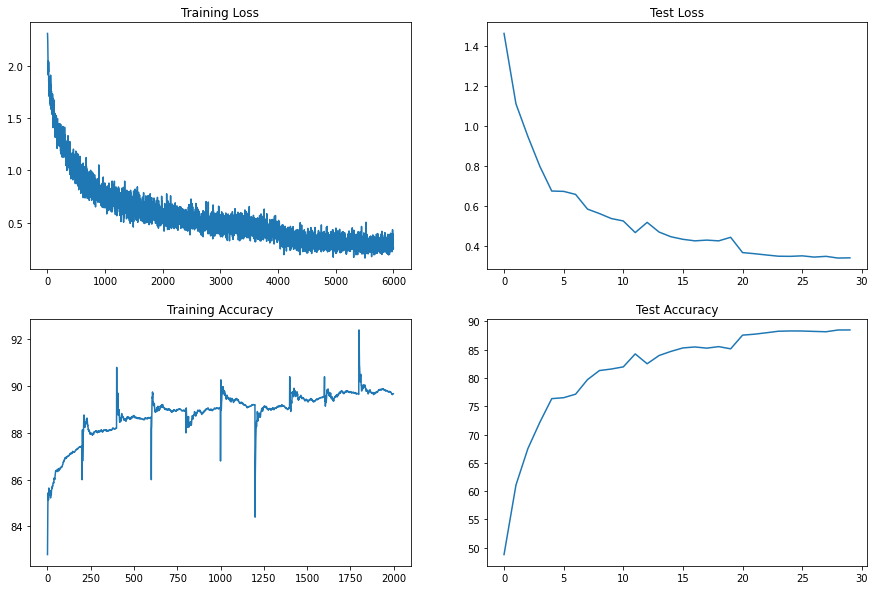

In [7]:
from asgnmt9.ModelPerformance import *

PlotTrainingGraphs(tt)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


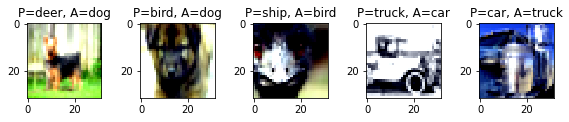

In [8]:
Misclassification(testloader,net,classes,device)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GroundTruth:    cat  ship  ship plane
Predicted:    cat  ship  ship plane
Accuracy of the network on the 10000 test images: 88 %
Accuracy of plane : 100 %
Accuracy of   car : 93 %
Accuracy of  bird : 65 %
Accuracy of   cat : 71 %
Accuracy of  deer : 76 %
Accuracy of   dog : 78 %
Accuracy of  frog : 88 %
Accuracy of horse : 87 %
Accuracy of  ship : 90 %
Accuracy of truck : 87 %


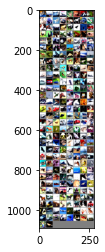

In [9]:
ViewModelPerformance(testloader,net,classes,device)